In [1]:
!nvidia-smi

Thu Dec 26 11:44:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.183.01             Driver Version: 535.183.01   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off | 00000000:01:00.0 Off |                  N/A |
| N/A   61C    P0              10W /  35W |    307MiB /  4096MiB |      5%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/home/hasnan/Downloads/Notebook


In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="gMjdystbA1QyBSj7ghNQ")
project = rf.workspace("imagerecognition-43zpb").project("helmet-detection-ntbfz")
version = project.version(18)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to helmet-detection-18 in yolov8:: 100%|██████████| 25739/25739 [00:01<00:00, 17768.37it/s]


In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

In [7]:
!yolo task=detect mode=train model=yolov8n.pt data=/home/hasnan/Downloads/Notebook/helmet-detection-18/data.yaml epochs=10 imgsz=640

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ne

In [11]:
!yolo val model=/home/hasnan/Downloads/Notebook/runs/detect/train8/weights/best.pt data=/home/hasnan/Downloads/Notebook/helmet-detection-18/data.yaml imgsz=640

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ul

In [13]:
!pip install matplotlib

In [17]:
!pip install opencv-python

In [21]:
import matplotlib.pyplot as plt
import cv2

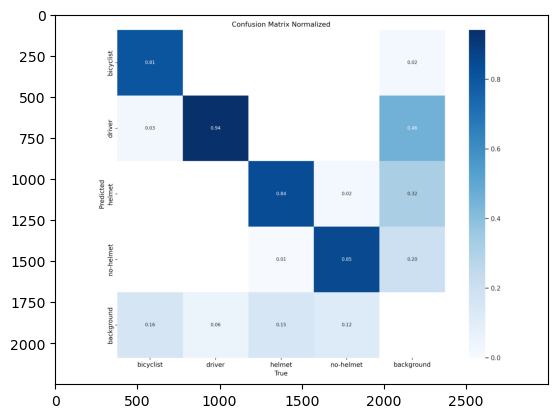

In [33]:
confusion_matrix_normalized = "/home/hasnan/Downloads/Notebook/runs/detect/val/confusion_matrix_normalized.png"
confusion_matrix_image = cv2.imread(confusion_matrix_normalized)
confusion_matrix_image_rgb = cv2.cvtColor(confusion_matrix_image, cv2.COLOR_BGR2RGB)
plt.imshow(confusion_matrix_image_rgb)
plt.show()

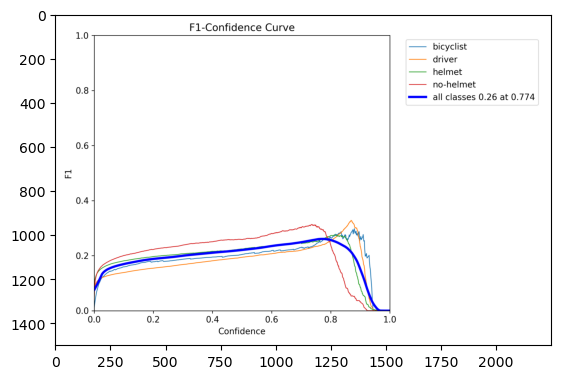

In [35]:
F1_curve_normalized = "/home/hasnan/Downloads/Notebook/runs/detect/val/F1_curve.png"
F1_curve_image = cv2.imread(F1_curve_normalized)
F1_curve_image_rgb = cv2.cvtColor(F1_curve_image, cv2.COLOR_BGR2RGB)
plt.imshow(F1_curve_image_rgb)
plt.show()

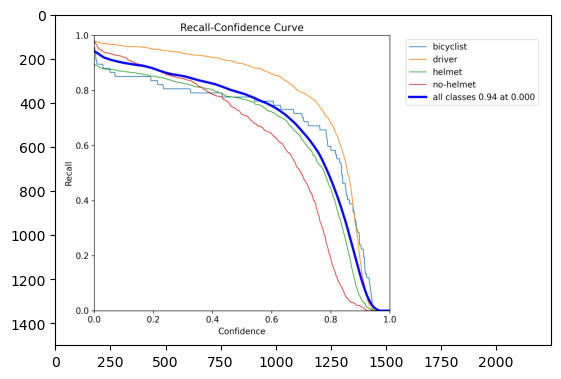

In [37]:
R_curve_normalized = "/home/hasnan/Downloads/Notebook/runs/detect/val/R_curve.png"
R_curve = cv2.imread(R_curve_normalized)
R_curve_RGB = cv2.cvtColor(R_curve, cv2.COLOR_BGR2RGB)
plt.imshow(R_curve_RGB)
plt.show()

In [ ]:
# Detection test with Random Images

In [39]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.34 🚀 Python-3.12.7 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3904MiB)
Setup complete ✅ (12 CPUs, 15.3 GB RAM, 172.5/361.0 GB disk)


In [41]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

In [45]:
model = YOLO('/home/hasnan/Downloads/Notebook/runs/detect/train8/weights/best.pt')

In [47]:
test_image_path = '/home/hasnan/Downloads/Notebook/runs/detect/test1.jpg'

In [49]:
results = model(test_image_path)


image 1/1 /home/hasnan/Downloads/Notebook/runs/detect/test1.jpg: 448x640 5 drivers, 3 helmets, 29.4ms
Speed: 2.2ms preprocess, 29.4ms inference, 244.8ms postprocess per image at shape (1, 3, 448, 640)


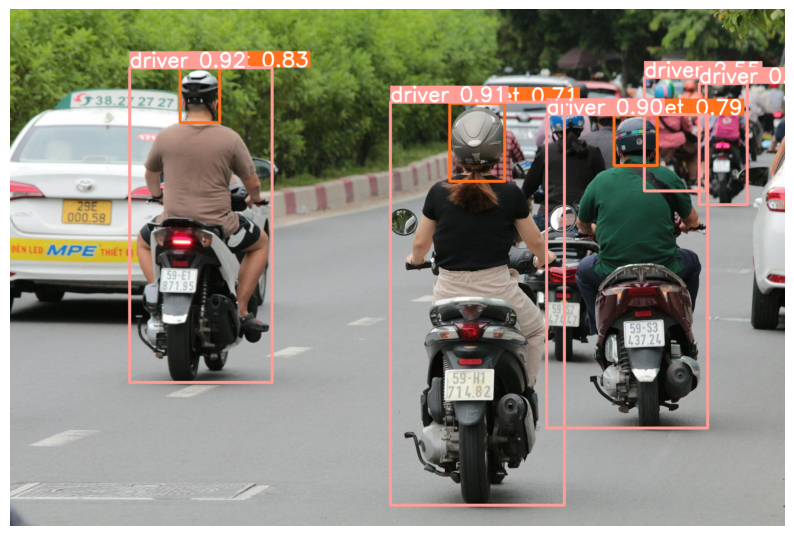

In [51]:
annotated_image = results[0].plot()
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [55]:
!yolo task=detect mode=predict model=/home/hasnan/Downloads/Notebook/runs/detect/train8/weights/best.pt source='/home/hasnan/Downloads/Notebook/runs/detect/test_video_1.mp4'

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ul

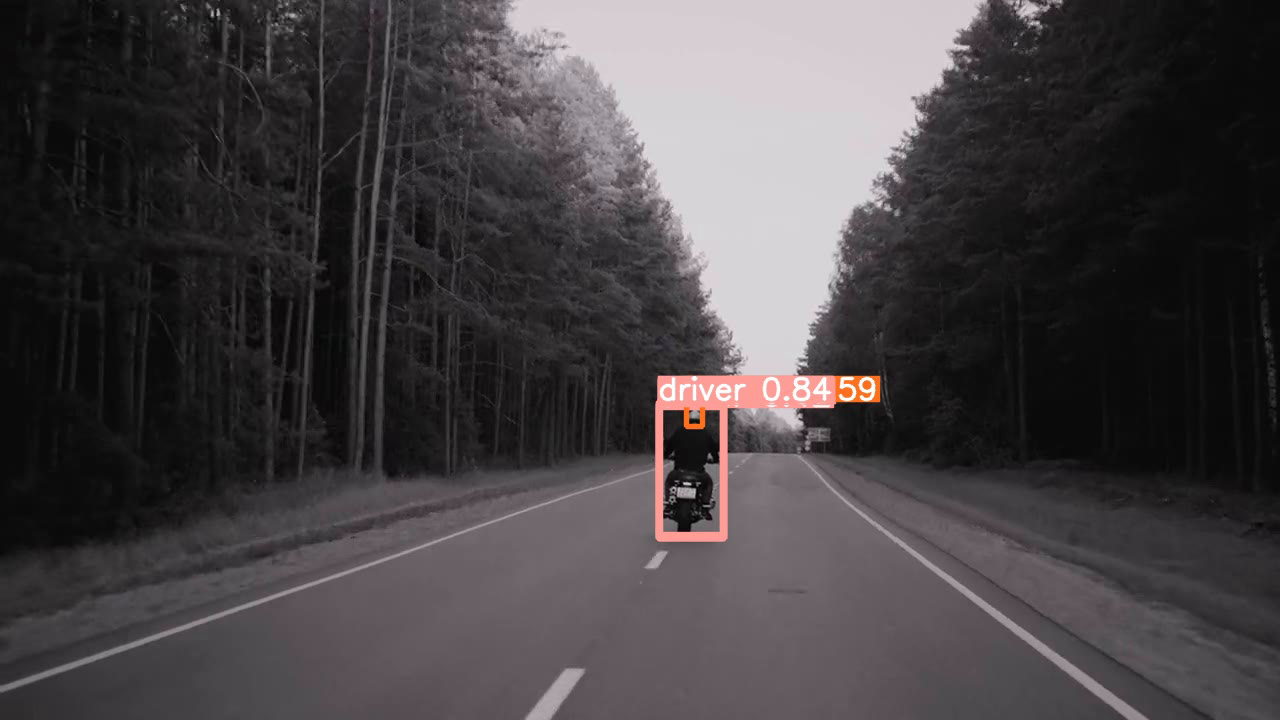

In [59]:
import cv2
from IPython.display import display, clear_output
from PIL import Image
import time

# Path to your AVI video file
video_path = "/home/hasnan/Downloads/Notebook/runs/detect/predict/test_video_1.avi"

# Open the AVI file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
else:
    # Read and display each frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Convert frame to PIL Image for Jupyter Notebook display
        img = Image.fromarray(frame_rgb)
        
        # Display the frame
        clear_output(wait=True)
        display(img)
        
        # Control playback speed (adjust for video frame rate)
        time.sleep(1 / 30)

    cap.release()


In [61]:
!yolo task=detect mode=predict model=/home/hasnan/Downloads/Notebook/runs/detect/train8/weights/best.pt source='/home/hasnan/Downloads/Notebook/runs/detect/test_video_2.mp4'

/home/hasnan/anaconda3/lib/python3.12/site-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ul

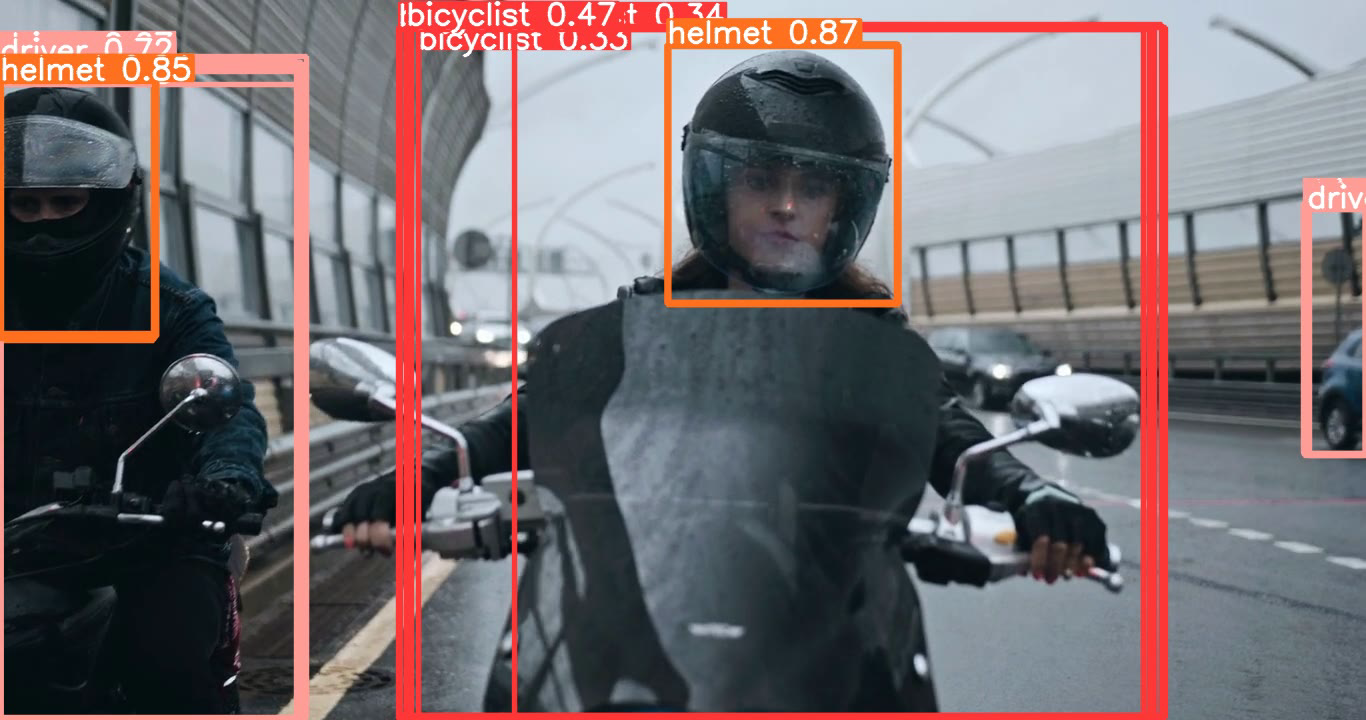

In [63]:
import cv2
from IPython.display import display, clear_output
from PIL import Image
import time

# Path to your AVI video file
video_path = "/home/hasnan/Downloads/Notebook/runs/detect/predict2/test_video_2.avi"

# Open the AVI file
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Unable to open video file.")
else:
    # Read and display each frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        # Convert frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Convert frame to PIL Image for Jupyter Notebook display
        img = Image.fromarray(frame_rgb)
        
        # Display the frame
        clear_output(wait=True)
        display(img)
        
        # Control playback speed (adjust for video frame rate)
        time.sleep(1 / 30)

    cap.release()